In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [8]:
df_train = pd.read_csv('train_function.csv')

N = len(df_train.index)
data = df_train[['X', 'y']].to_numpy()

train_size = 0.8

X_train, y_train = data[:int(train_size*N)][:, 0], data[:int(train_size*N)][:, 1]
X_val, y_val = data[int(train_size*N):][:, 0], data[int(train_size*N):][:, 1]

y_train = np.sqrt(y_train) # No linearidad
y_val = np.sqrt(y_val)

mean_y = np.mean(y_train)
mean_X = np.mean(X_train)
std_y = np.std(y_train)
std_X = np.std(X_train)

X_train = (X_train - mean_X) / std_X
y_train = (y_train - mean_y) / std_y

X_val = (X_val - mean_X) / std_X
y_val = (y_val - mean_y) / std_y

# List to Numpy array
X_train = np.asarray(X_train).reshape(-1,1)
y_train = np.asarray(y_train)

X_val = np.asarray(X_val).reshape(-1,1)
y_val = np.asarray(y_val)


In [9]:
X_train.shape, y_train.shape

((160, 1), (160,))

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
df_test= pd.read_csv('test_function.csv')
data_test = df_test[['X','y']].to_numpy()
X_test, y_test = data_test[:,0], data_test[:,1]

X_test = (X_test - mean_X)/std_X
X_test = np.asarray(X_test).reshape(-1,1)

y_pred = model.predict(X_test)
y_pred = y_pred*std_y + mean_y
y_pred = y_pred**2

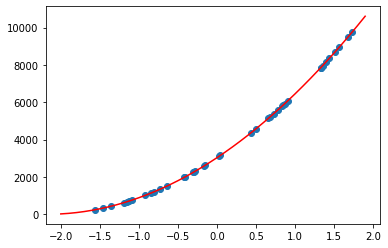

In [14]:
plt.scatter(X_test, y_pred)
plt.plot(np.arange(-2,2,0.1), (model.predict(np.arange(-2,2,0.1).reshape(-1,1))*std_y + mean_y)**2, 'r')
plt.show()

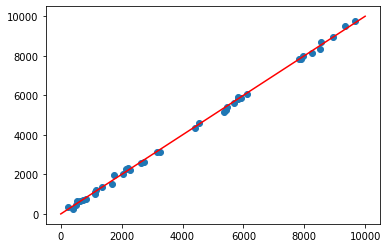

In [15]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(10000),np.arange(10000) ,'r')
plt.show()

In [16]:
n_test = len(y_test)
MAE = (1/n_test)*sum([abs(y_pred[i] - y_test[i]) for i in range(n_test)])
MSE = (1/n_test)*sum([(y_pred[i] - y_test[i])**2 for i in range(n_test)])
RMSE = np.sqrt(MSE)

print(f'RSME: {RMSE}, MAE: {MAE}')

RSME: 101.5611713252209, MAE: 81.47128440543729
